In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,LeakyReLU
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf

import json

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open('data/mapping.json') as f:
    CLASS_MAPPING = json.load(f)

In [3]:
train = pd.read_csv('data/emnist-balanced-train.csv',header=None)
test = pd.read_csv('data/emnist-balanced-test.csv',header=None)

In [4]:
train.shape

(112800, 785)

In [5]:
test.shape

(18800, 785)

In [6]:
#28*28 image
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
len(pd.unique(train[0]))

47

In [8]:
len(pd.unique(test[0]))

47

In [9]:
X_train = train.drop(0,axis=1)
y_train = train[0]
X_train = X_train.values.reshape((len(X_train),28,28,1))

In [10]:
X_test = test.drop(0,axis=1)
y_test = test[0]
X_test = X_test.values.reshape((len(X_test),28,28,1))

Q


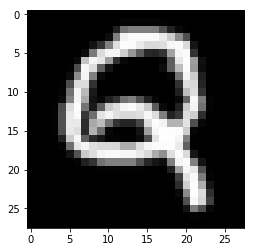

In [11]:
plt.imshow(X_train[6].transpose().reshape(28,28),cmap='gray')
print(CLASS_MAPPING[str(y_train[6])])

In [25]:
batch_size = 500
num_classes = len(pd.unique(train[0]))
epochs = 50

In [13]:
#28x28 pixel images
img_rows,img_cols = 28,28

In [14]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
    X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
    X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)  
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


X_train_tmp = []
for x in X_train:
    X_train_tmp.append(x.transpose().reshape(28,28,1))
X_train= np.array(X_train_tmp)

X_test_tmp = []
for x in X_test:
    X_test_tmp.append(x.transpose().reshape(28,28,1))
X_test= np.array(X_test_tmp)


y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


print("X_train shape: "+ str(X_train.shape))
print("X_test shape: "+ str(X_test.shape))

X_train shape: (112800, 28, 28, 1)
X_test shape: (18800, 28, 28, 1)


In [ ]:
def base_model(num_classes,input_shape):
    
    model = Sequential()
    
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(64,(3,3),activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128,activation='relu'))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes,activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer = keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    return model 

In [22]:
def model_v1(num_classes,input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))           
    model.add(Dropout(0.3))
    
    model.add(Dense(256, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))           
    model.add(Dropout(0.3))
    
    model.add(Dense(256, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))           
    model.add(Dropout(0.3))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    #model.load_weights("model/model_v1_best_weights.h5")
    model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer = keras.optimizers.adam(),
                      metrics=['accuracy'])
    return model

In [19]:
def model_vgg16(num_classes,input_shape):
    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'))  
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    #model.load_weights("model/model_vgg16_best_weights.h5")
    
    model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer = keras.optimizers.adam(),
                      metrics=['accuracy'])
    return model


In [26]:
model = model_v1(num_classes,input_shape)

# checkpoint
filepath="model/model_v1_best_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(X_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks_list,
          validation_data=(X_test,y_test))

Train on 112800 samples, validate on 18800 samples
Epoch 1/50
112800/112800 [==============================] - 24s 213us/step - loss: 1.7877 - acc: 0.4781 - val_loss: 0.6118 - val_acc: 0.7989

Epoch 00001: val_acc improved from -inf to 0.79888, saving model to model/model_v1_best_weights.h5
Epoch 2/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.7358 - acc: 0.7549 - val_loss: 0.4586 - val_acc: 0.8395

Epoch 00002: val_acc improved from 0.79888 to 0.83947, saving model to model/model_v1_best_weights.h5
Epoch 3/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.6005 - acc: 0.7960 - val_loss: 0.4170 - val_acc: 0.8541

Epoch 00003: val_acc improved from 0.83947 to 0.85410, saving model to model/model_v1_best_weights.h5
Epoch 4/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.5384 - acc: 0.8155 - val_loss: 0.3902 - val_acc: 0.8638

Epoch 00004: val_acc improved from 0.85410 to 0.86378, saving model to model/m

112800/112800 [==============================] - 23s 200us/step - loss: 0.3184 - acc: 0.8823 - val_loss: 0.2903 - val_acc: 0.8937

Epoch 00038: val_acc did not improve
Epoch 39/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.3179 - acc: 0.8818 - val_loss: 0.2929 - val_acc: 0.8930

Epoch 00039: val_acc did not improve
Epoch 40/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.3127 - acc: 0.8835 - val_loss: 0.2883 - val_acc: 0.8949

Epoch 00040: val_acc did not improve
Epoch 41/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.3118 - acc: 0.8841 - val_loss: 0.2915 - val_acc: 0.8935

Epoch 00041: val_acc did not improve
Epoch 42/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.3133 - acc: 0.8836 - val_loss: 0.2913 - val_acc: 0.8931

Epoch 00042: val_acc did not improve
Epoch 43/50
112800/112800 [==============================] - 23s 200us/step - loss: 0.3099 - acc: 0.8844 - val_l

In [ ]:
model = model_vgg16(num_classes,input_shape)

# checkpoint
filepath="model/model_vgg16_best_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(X_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=callbacks_list,
          validation_data=(X_test,y_test))

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2871089642605883
Test accuracy: 0.8962765957446809


In [28]:
model_json = model.to_json()
with open('model/model.json','w') as f:
    f.write(model_json)
model.save_weights('model/model.h5')

## Transfer Learning

In [31]:
from keras.applications import InceptionV3
#import cv2
import pickle

In [34]:
sess = tf.InteractiveSession()

In [33]:
#Initial Shape
X_train[0].shape

(28, 28, 1)

In [32]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
NB_IV3_LAYERS_TO_FREEZE = 172

In [ ]:
resize = cv2.resize(X_train[1], (150,150))
img = cv2.cvtColor(resize,cv2.COLOR_GRAY2RGB)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
def preprocess_img(img):
    resize = cv2.resize(img, (IMG_HEIGHT,IMG_WIDTH))
    rgb_img = cv2.cvtColor(resize,cv2.COLOR_GRAY2RGB)
    return rgb_img

In [ ]:
def get_every_n(a, n):
    for i in range(a.shape[0] // n):
        yield a[n*i:n*(i+1)]

X_train_imgs = []
for x_train_tmp in get_every_n(X_train,100):
    for tmp_img in x_train_tmp:
        X_train_imgs.append(preprocess_img(tmp_img))

In [ ]:
with open('data/X_train_imgs_150_150.pkl','w') as f:
    pickle.dump(X_train_imgs,f)

In [ ]:
def add_new_last_layer(base_model, nb_classes):
  """
  Add last layer to the convnet
  Args:
    base_model: keras model excluding top
    nb_classes: # of classes
  Returns:
    new keras model with last layer
  """
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x) 
  predictions = Dense(nb_classes, activation='softmax')(x) 
  model = Model(input=base_model.input, output=predictions)
  return model

In [ ]:
def setup_to_transfer_learn(model, base_model):
  """Freeze all layers and compile the model"""
  for layer in base_model.layers:
    layer.trainable = False
  model.compile(optimizer='rmsprop',    
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [ ]:
def setup_to_finetune(model):
   """Freeze the bottom NB_IV3_LAYERS and retrain the remaining top 
      layers.
   note: NB_IV3_LAYERS corresponds to the top 2 inception blocks in 
         the inceptionv3 architecture
   Args:
     model: keras model
   """
   for layer in model.layers[:NB_IV3_LAYERS_TO_FREEZE]:
      layer.trainable = False
   for layer in model.layers[NB_IV3_LAYERS_TO_FREEZE:]:
      layer.trainable = True
   model.compile(optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),   
                 loss='categorical_crossentropy')
   return model

In [ ]:
plt.imshow(preprocess_img(X_train[0]))

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_img)

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [ ]:
model = add_new_last_layer(base_model, num_classes)

In [ ]:
history = model.fit(X_train_imgs,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_train_imgs,y_train))

In [ ]:
model =setup_to_finetune(model)